In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

In [28]:
#Stuff from class in this cell

sig=0.1

def fun(x):
    return 1.0/(1.0+x**2)

def fun2(x):
    return 1.0+np.exp(-0.5*x**2/(sig**2))

def simple_integrate_class(fun,a,b,tol): #from class
    x=np.linspace(a,b,5)
    dx=(b-a)/4.0
    #np.median(np.diff(x))
    y=fun(x)
    neval=len(x) #let's keep track of function evaluations
    f1=(y[0]+4*y[2]+y[4])/6.0*(b-a)
    f2=(y[0]+4*y[1]+2*y[2]+4*y[3]+y[4])/12.0*(b-a)
    myerr=np.abs(f2-f1)
    #print([a,b,f1,f2])
    if (myerr<tol):
        #return (f2)/1.0,myerr,neval
        return (16.0*f2-f1)/15.0,myerr,neval
    else:
        mid=0.5*(b+a)
        f_left,err_left,neval_left=simple_integrate_class(fun,a,mid,tol/2.0)
        f_right,err_right,neval_right=simple_integrate_class(fun,mid,b,tol/2.0)
        neval=neval+neval_left+neval_right
        f=f_left+f_right
        err=err_left+err_right
        return f,err,neval

In [35]:
#Results from class

f,err,neval=simple_integrate_class(np.exp,-1,1,1e-5)

pred=np.exp(1)-np.exp(-1)

#f,err,neval=simple_integrate_class(fun,-1,1,1e-4);pred=np.arctan(1)-np.arctan(-1)
#a=-5;b=5;f,err,neval=simple_integrate_class(fun2,a,b,1e-4);pred=(b-a)+np.sqrt(2*np.pi)*sig
print('f,err,neval are ' + repr([f,err,neval])+' with err ' + repr(np.abs(f-pred)))

f,err,neval are [2.350402387583493, 2.9828635745715593e-06, 75] with err 2.958904232741588e-10


In [63]:
#New class here for "smarter" integration with less function calls


def less_simple_integrate(fun,a,b,tol, lr="none", y_old=np.zeros(5)): #Doesn't call fun(x) multiple times for same x
    x=np.linspace(a,b,5)
    #dx=(b-a)/4.0
    y=np.zeros(5)
    neval=0
    #print(y)
    #print(y_old)
    if lr == "l":
        y[0] = y_old[0] #Left bound is the same
        y[2] = y_old[1] #We can carry the mid over
        y[4] = y_old[2] #Old mid is now right bound
        y[1] = fun(x[1])
        y[3] = fun(x[3])
        neval +=2
    elif lr == "r":
        y[0] = y_old[2] #Old mid is the new left bound
        y[4] = y_old[4] #Right bound is the same 
        y[2] = y_old[3]
        y[1] = fun(x[1])
        y[3] = fun(x[3])
        neval+=2
    else:
        y=fun(x)
        neval+=5
        y_left = y[0]
        y_right = y[4]
        y_mid = y[2]


    f1=(y[0]+4*y[2]+y[4])/6.0*(b-a)
    f2=(y[0]+4*y[1]+2*y[2]+4*y[3]+y[4])/12.0*(b-a)

    myerr=np.abs(f2-f1)

    #print([a,b,f1,f2])
    if (myerr<tol):
        #return (f2)/1.0,myerr,neval
        return (16.0*f2-f1)/15.0,myerr,neval
    else:
        mid=0.5*(b+a)
        
        f_right,err_right,neval_right=less_simple_integrate(fun,x[2],x[4],tol/2.0, "r", y)
        f_left,err_left,neval_left=less_simple_integrate(fun,x[0],x[2],tol/2.0, "l", y)
        

        neval=neval+neval_left+neval_right

        f=f_left+f_right
        err=err_left+err_right

        return f,err,neval


In [69]:
tol = 1e-8

f,err,neval = less_simple_integrate(np.exp,-1,1,tol)

pred=np.exp(1)-np.exp(-1)

#f,err,neval=simple_integrate_class(fun,-1,1,1e-4);pred=np.arctan(1)-np.arctan(-1)
#a=-5;b=5;f,err,neval=simple_integrate_class(fun2,a,b,1e-4);pred=(b-a)+np.sqrt(2*np.pi)*sig
print('NEW: f,err,neval are ' + repr([f,err,neval])+' with err ' + repr(np.abs(f-pred)))

#Results from class

f,err,neval=simple_integrate_class(np.exp,-1,1,tol)

pred=np.exp(1)-np.exp(-1)

#f,err,neval=simple_integrate_class(fun,-1,1,1e-4);pred=np.arctan(1)-np.arctan(-1)
#a=-5;b=5;f,err,neval=simple_integrate_class(fun2,a,b,1e-4);pred=(b-a)+np.sqrt(2*np.pi)*sig
print('CLASS: f,err,neval are ' + repr([f,err,neval])+' with err ' + repr(np.abs(f-pred)))


NEW: f,err,neval are [2.350402387287623, 3.6728021630960672e-09, 193] with err 2.042810365310288e-14
CLASS: f,err,neval are [2.350402387287623, 3.6728021630960672e-09, 475] with err 2.042810365310288e-14


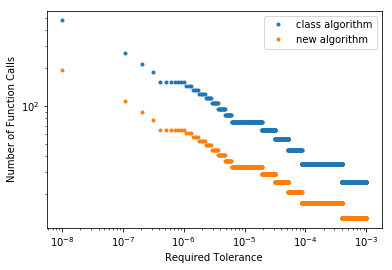

In [83]:
tol = np.linspace(1e-8, 1e-3, 10000)
numCallsClass = np.zeros(len(tol))
numCallsNew = np.zeros(len(tol))

for i, t in enumerate(tol):
    numCallsClass[i] = simple_integrate_class(np.exp,-1,1,t)[2]
    numCallsNew[i] = less_simple_integrate(np.exp,-1,1,t)[2]


plt.plot(tol, numCallsClass, '.', label='class algorithm')
plt.plot(tol, numCallsNew, '.', label='new algorithm')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Required Tolerance')
plt.ylabel('Number of Function Calls')
plt.legend()